['EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2010_emiss2010_UK_2010_day_PM25.nc', 'EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2011_emiss2011_UK_2011_day_PM25.nc', 'EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2012_emiss2012_UK_2012_day_PM25.nc', 'EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2013_emiss2013_UK_2013_day_PM25.nc', 'EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2014_emiss2014_UK_2014_day_PM25.nc', 'EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2015_emiss2015_UK_2015_day_PM25.nc', 'EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2016_emiss2015_UK_2016_day_PM25.nc']


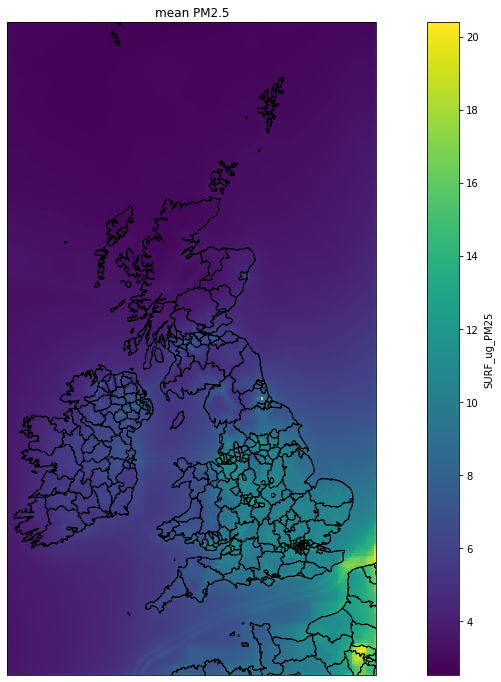

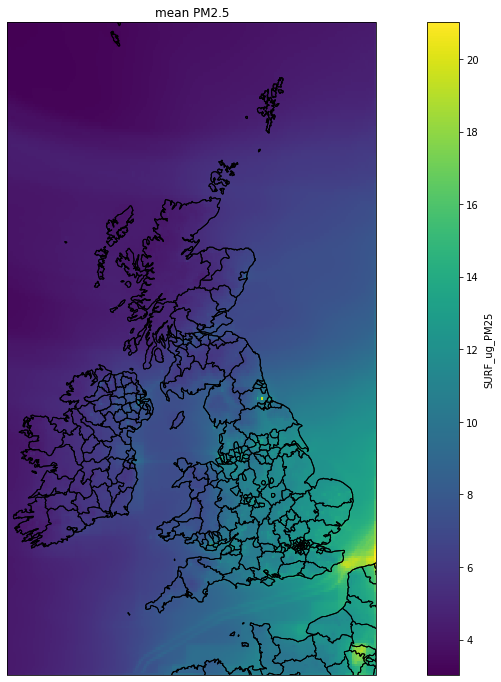

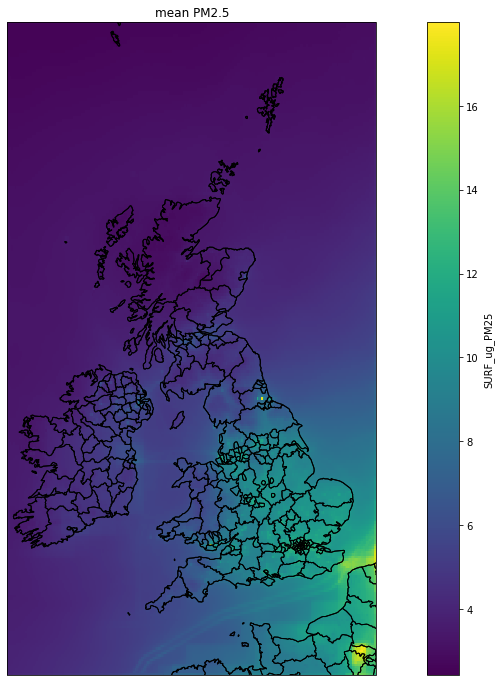

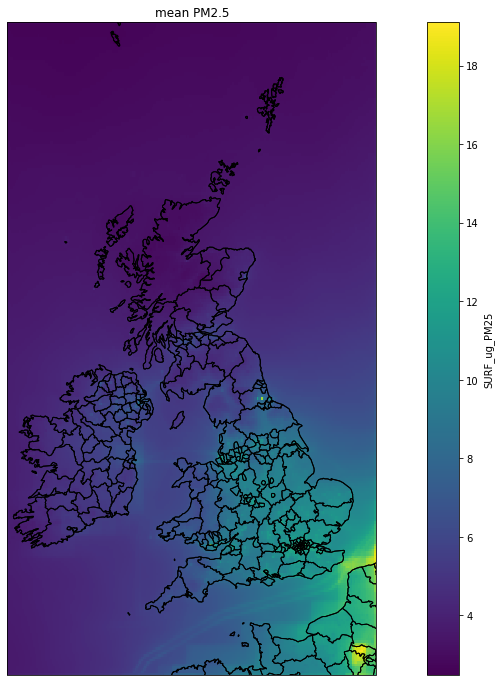

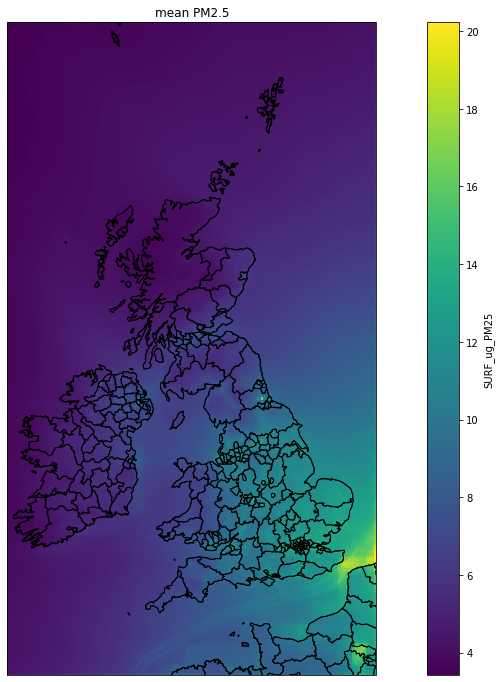

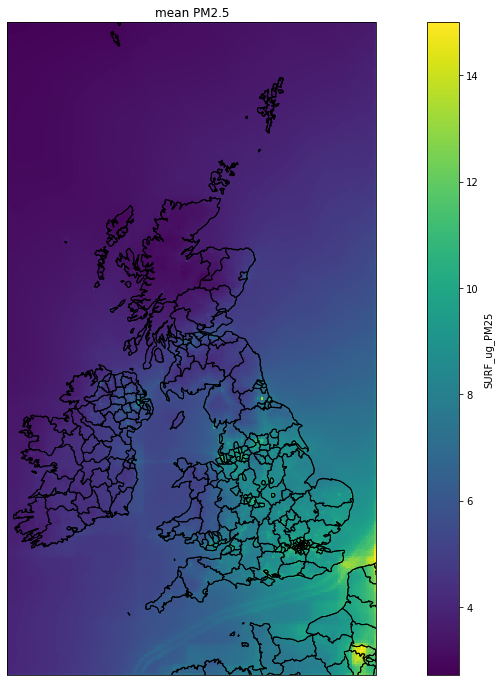

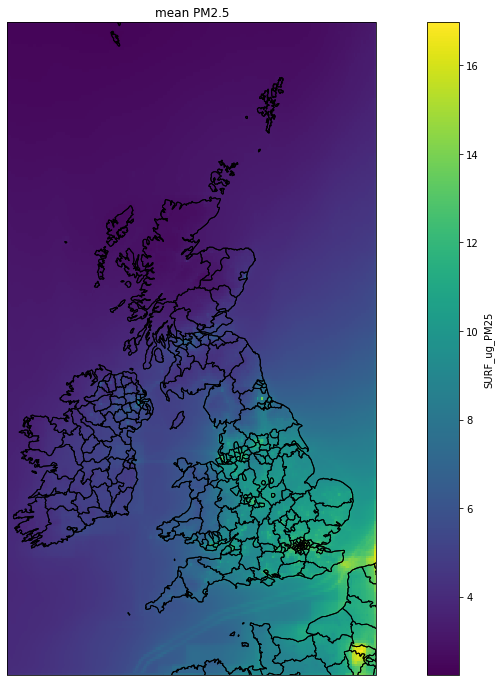

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from ipywidgets import interactive
import matplotlib as mpl
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
import matplotlib.collections as col
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import (OCEAN, LAKES, BORDERS, COASTLINE, RIVERS, COLORS,
                             LAND)
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
from wrf import (getvar, to_np, vertcross, smooth2d, CoordPair, GeoBounds,
                 get_cartopy, latlon_coords, cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
import os
import pandas as pd
import glob

directory = r'C:\Users\conno\OneDrive\Documents\pythonstuff\EMEP'

statesetc = shpreader.natural_earth(resolution='10m',# downloads states & provinces from Natural Earth
                                      category='cultural',
                                      name='admin_1_states_provinces') #only works at this resolution, but doesn't seem to be correct as a dataset - it has a weird mix of counties and local authorities i.e London Boroughs and Tyneside LAs identified, but not Cumbria or Norfolk LAs
shape_feature_another = ShapelyFeature(Reader(statesetc).geometries(),
                                ccrs.PlateCarree(), edgecolor='black', facecolor = 'none') #setting the facecolor as none is important, otherwise you can't see what is being plotted 

files = os.listdir(directory) # need to make sure python file is saved in the same directory
filelist = []
for f in files:
    if f.endswith(".nc"):
        filelist.append(f) # turns the files into a list which can be iterated over
        
print (filelist)
for f in filelist:      # for each file in filelist, this makes a dataset and then plots a map from it, I think
    data = xr.open_dataset(f)
    pm = data['SURF_ug_PM25']
    pm25 = pm.mean(dim = 'time')
    fig = plt.figure (figsize = (18, 12))
    ax =plt.axes(projection = ccrs.Mercator(central_longitude = 1.96)) 
    ax.coastlines()
    #ax.add_feature(cartopy.feature.BORDERS, linestyle=':') don't really need this
    ax.set_extent([-10.7,2.6,48.5,61.8])
    ax.add_feature(shape_feature_another) 
    pm25.plot(transform=ccrs.PlateCarree())

    plt.title ('mean PM2.5')
    plt.show